# EDA

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split

bank_df = pd.read_csv("/workspaces/logistic-regression-project-tutorial-pilarzarco/data/bank-marketing-campaign-data.csv", sep = ";")
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [38]:
bank_df.shape

(41188, 21)

In [39]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [40]:
# Eliminar duplicados
bank_df = bank_df.drop_duplicates().reset_index(drop = True)
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [41]:
# Contar cuántas veces aparece "nonexistent" en la columna 'poutcome', deci
non_existent = (bank_df['poutcome'] == "nonexistent").sum()
non_existent

# Decido eliminarla ya que no aporta datos suficientes
bank_df = bank_df.drop(["poutcome"], axis=1, inplace=False)
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no


#### - Análisis de variables univariante

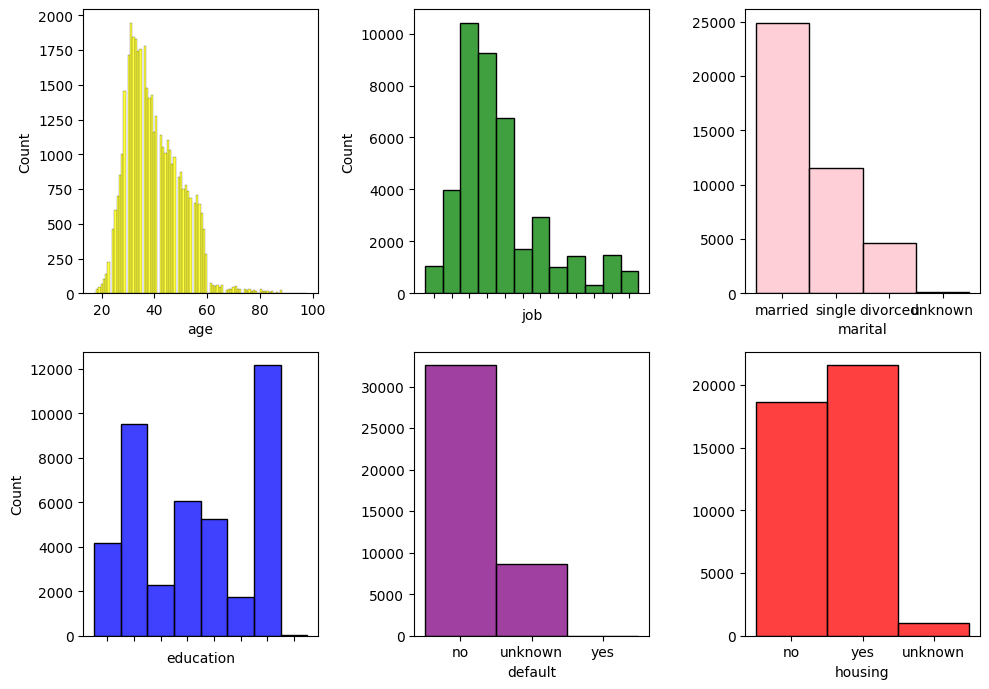

In [42]:
# Hacemos el análisis univariante de todas las variables
import seaborn as sns
import matplotlib.pyplot as plt

fig, axis= plt.subplots(2, 3, figsize=(10, 7))

sns.histplot(ax=axis[0, 0], data=bank_df, x="age", color="yellow")
sns.histplot(ax=axis[0, 1], data=bank_df, x="job", color="green").set_xticklabels([])
sns.histplot(ax=axis[0, 2], data=bank_df, x="marital", color="pink").set(ylabel=None)
sns.histplot(ax=axis[1, 0], data=bank_df, x="education", color="blue").set_xticklabels([])
sns.histplot(ax=axis[1, 1], data=bank_df, x="default", color="purple").set(ylabel=None)
sns.histplot(ax=axis[1, 2], data=bank_df, x="housing", color="red").set(ylabel=None)

plt.tight_layout()
plt.show()

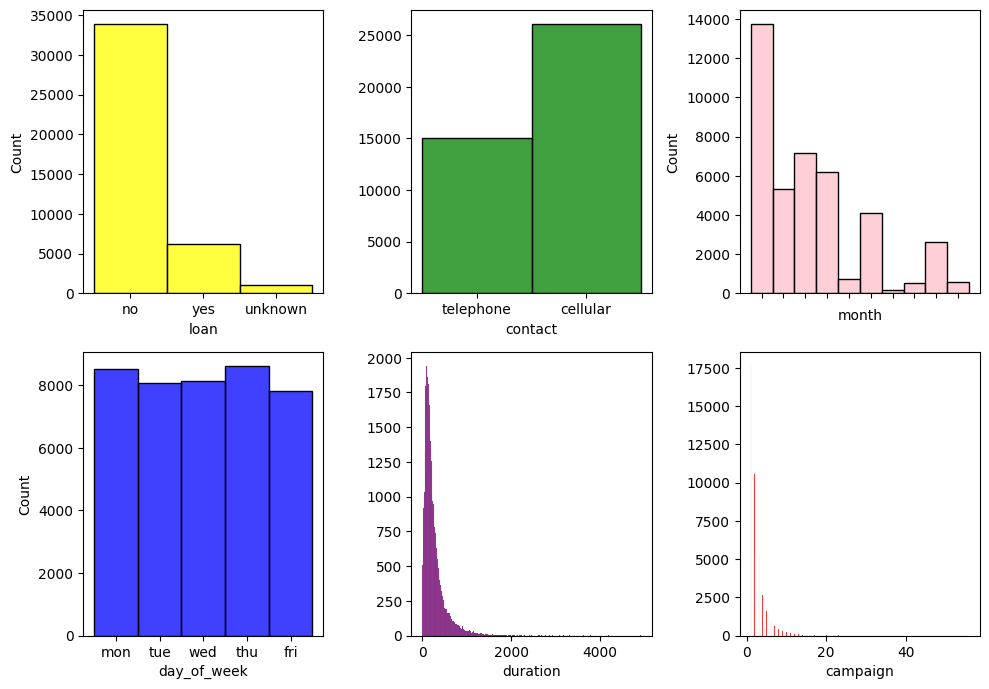

In [43]:
fig, axis= plt.subplots(2, 3, figsize=(10, 7))

sns.histplot(ax=axis[0, 0], data=bank_df, x="loan", color="yellow")
sns.histplot(ax=axis[0, 1], data=bank_df, x="contact", color="green").set(ylabel=None)
sns.histplot(ax=axis[0, 2], data=bank_df, x="month", color="pink").set_xticklabels([])
sns.histplot(ax=axis[1, 0], data=bank_df, x="day_of_week", color="blue")
sns.histplot(ax=axis[1, 1], data=bank_df, x="duration", color="purple").set(ylabel=None)
sns.histplot(ax=axis[1, 2], data=bank_df, x="campaign", color="red").set(ylabel=None)

plt.tight_layout()
plt.show()

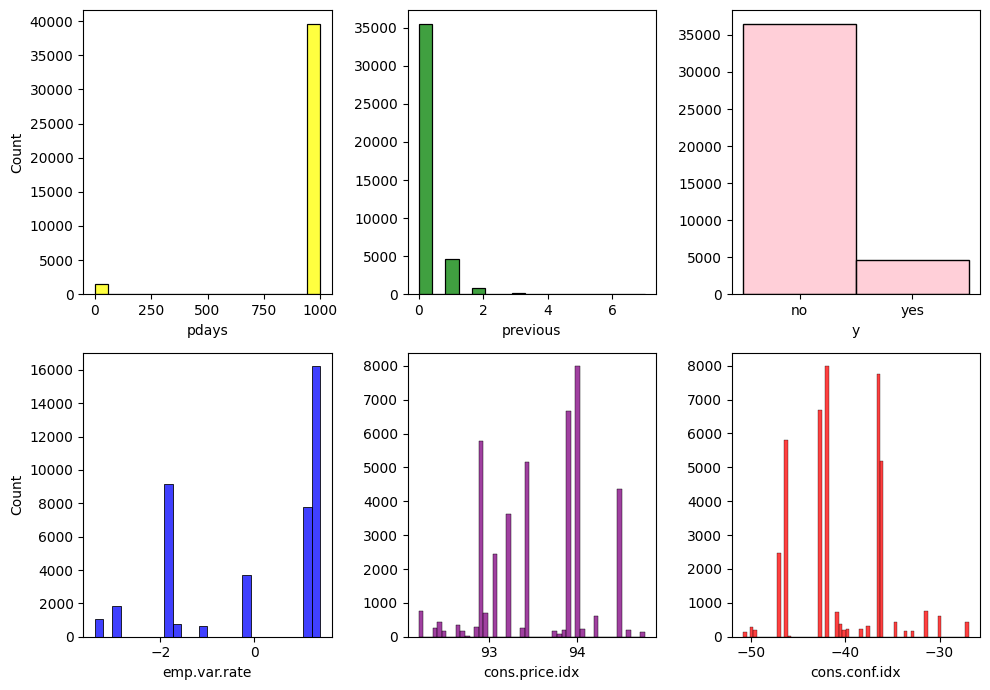

In [44]:
fig, axis= plt.subplots(2, 3, figsize=(10, 7))

sns.histplot(ax=axis[0, 0], data=bank_df, x="pdays", color="yellow")
sns.histplot(ax=axis[0, 1], data=bank_df, x="previous", color="green").set(ylabel=None)
sns.histplot(ax=axis[0, 2], data=bank_df, x="y", color="pink").set(ylabel=None)
sns.histplot(ax=axis[1, 0], data=bank_df, x="emp.var.rate", color="blue")
sns.histplot(ax=axis[1, 1], data=bank_df, x="cons.price.idx", color="purple").set(ylabel=None)
sns.histplot(ax=axis[1, 2], data=bank_df, x="cons.conf.idx", color="red").set(ylabel=None)

plt.tight_layout()
plt.show()

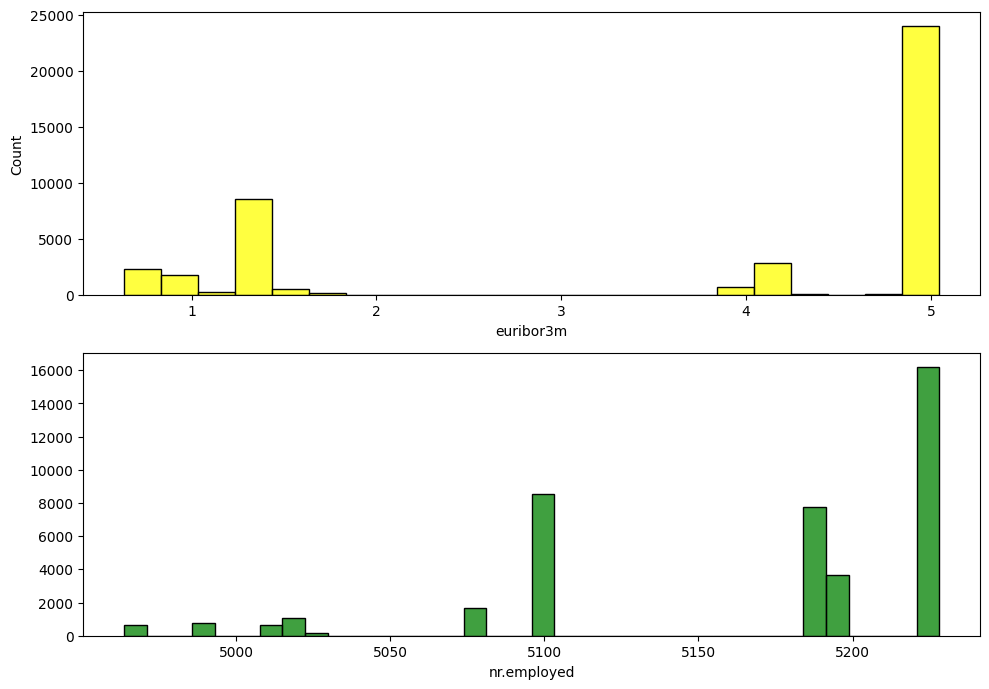

In [45]:
fig, axis= plt.subplots(2, figsize=(10, 7))

sns.histplot(ax=axis[0], data=bank_df, x="euribor3m", color="yellow")
sns.histplot(ax=axis[1], data=bank_df, x="nr.employed", color="green").set(ylabel=None)


plt.tight_layout()
plt.show()

#### - Análisis de variables multivariante

<Axes: xlabel='loan', ylabel='count'>

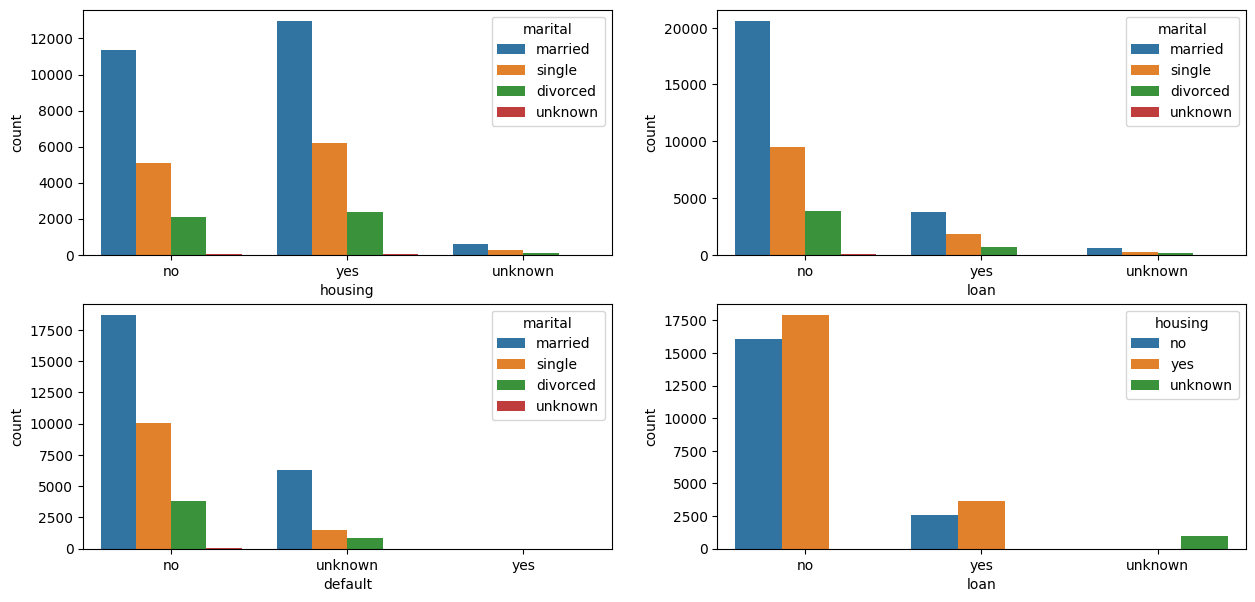

In [46]:
# Análisis Categórico-categórico
fig, axis = plt.subplots(2, 2, figsize = (15, 7))

sns.countplot(ax = axis[0, 0], data = bank_df, x = "housing", hue = "marital")
sns.countplot(ax = axis[0, 1], data = bank_df, x = "loan", hue = "marital")
sns.countplot(ax = axis[1, 0], data = bank_df, x = "default", hue = "marital")
sns.countplot(ax = axis[1, 1], data = bank_df, x = "loan", hue = "housing")


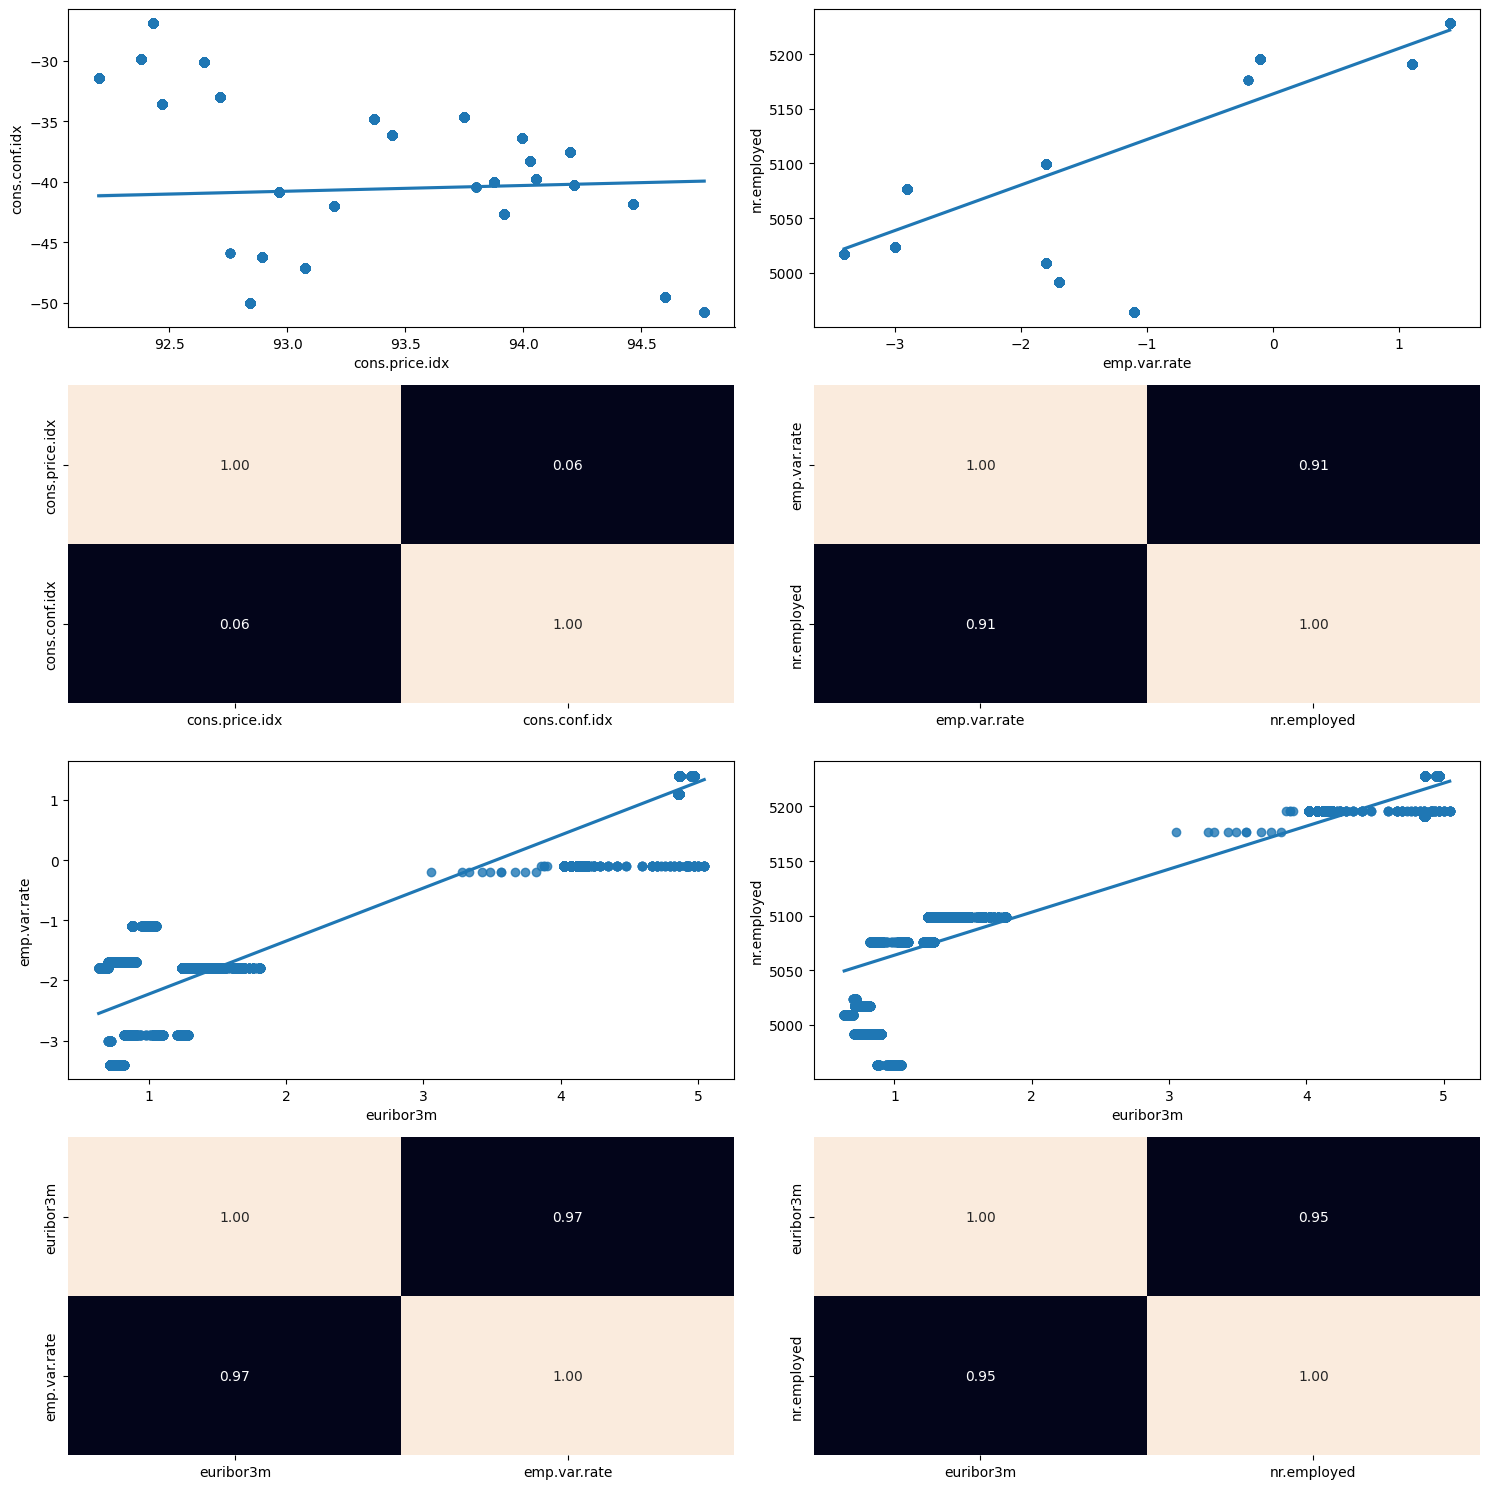

In [47]:
# Análisis numérico-numérico
fig, axis = plt.subplots(4, 2, figsize = (15, 15))


sns.regplot(ax = axis[0, 0], data = bank_df, x = "cons.price.idx", y = "cons.conf.idx")
sns.heatmap(bank_df[["cons.price.idx", "cons.conf.idx"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = bank_df, x = "emp.var.rate", y = "nr.employed")
sns.heatmap(bank_df[["emp.var.rate", "nr.employed"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(ax = axis[2, 0], data = bank_df, x = "euribor3m", y = "emp.var.rate")
sns.heatmap(bank_df[["euribor3m", "emp.var.rate"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(ax = axis[2, 1], data = bank_df, x = "euribor3m", y = "nr.employed")
sns.heatmap(bank_df[["euribor3m", "nr.employed"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

plt.tight_layout()
plt.show()


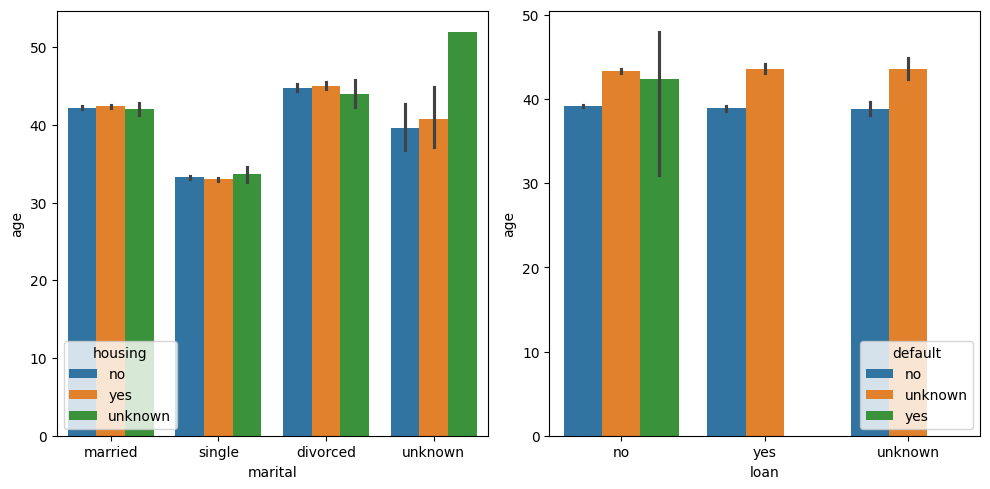

In [48]:
# Relacionamos varias predictoras
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.barplot(ax = axis[0], data = bank_df, x = "marital", y = "age", hue = "housing")
sns.barplot(ax = axis[1], data = bank_df, x = "loan", y = "age", hue = "default")

plt.tight_layout()

plt.show()

In [49]:
# Factorizar variables categóricas
bank_df["job_n"] = pd.factorize(bank_df["job"])[0]
bank_df["marital_n"] = pd.factorize(bank_df["marital"])[0]
bank_df["education_n"] = pd.factorize(bank_df["education"])[0]
bank_df["default_n"] = pd.factorize(bank_df["default"])[0]
bank_df["housing_n"] = pd.factorize(bank_df["housing"])[0]
bank_df["loan_n"] = pd.factorize(bank_df["loan"])[0]
bank_df["contact_n"] = pd.factorize(bank_df["contact"])[0]
bank_df["month_n"] = pd.factorize(bank_df["month"])[0]
bank_df["day_of_week_n"] = pd.factorize(bank_df["day_of_week"])[0]
bank_df["y_n"] = pd.factorize(bank_df["y"])[0]

num_variables_n = ["job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "contact_n", "month_n", "day_of_week_n",
                 "age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y_n"]

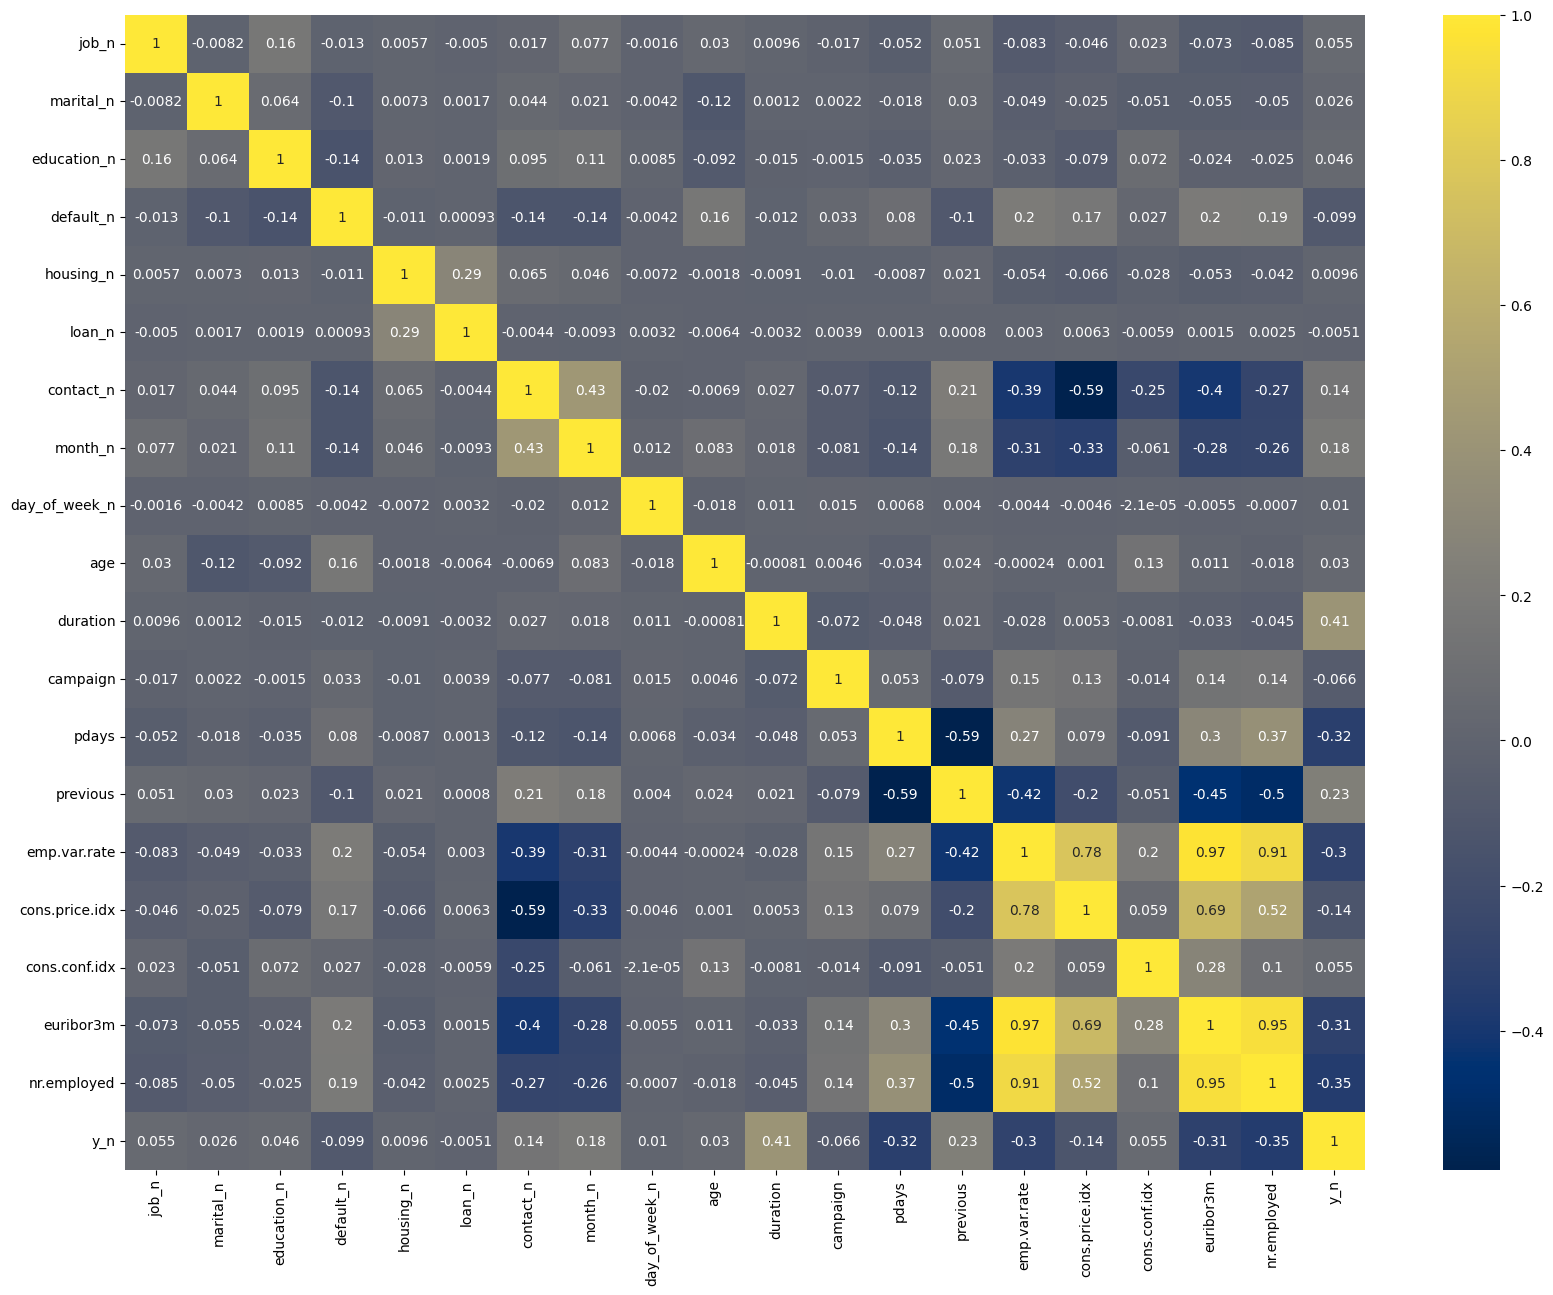

In [50]:
# Mapa de correlación completo
fig, axis = plt.subplots(figsize=(20, 15))

sns.heatmap(bank_df[["job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "contact_n", "month_n", "day_of_week_n",
                 "age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y_n"]].corr(), annot=True, cmap="cividis")

plt.show()


* Tenemos un mapa de calor débil, con pocas correlaciones.
* Podemos decir que hay correlación positiva fuerte entre:
    * La 'tasa de Euribor' y la 'tasa de variación del empleo'.
    * La 'tasa de Euribor' y el 'número de empleados'.
    * La 'tasa de variación del empleo' y 'número de empleados'.
    * El 'Número de contactos realizados durante la campaña anterior al cliente ' y el 'Resultado de la campaña de marketing anterior'.
    * La 'tasa de variación del empleo ' y 'Índice de precios al consumidor'.
* Analizamos la correlación de 'Y', tenemos correlaciones débiles y/o generales:
    * Débil con 'Duración del contacto previo en segundos'
    * General con:
        * 'Tipo de comunicación de contacto'
        * 'Último mes en el que se le ha contactado'
        * 'Número de contactos realizados durante la campaña anterior al cliente'
        * 'Resultado de la campaña de marketing anterior'

#### - Análisis de valores atípicos

In [51]:
# Análisis descriptivo
bank_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,y_n
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870,3.673863,0.510637,3.277370,0.208908,0.571959,0.199825,0.634714,2.249951,1.979600,0.112663
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364,2.454340,0.696794,2.185558,0.406713,0.541216,0.456055,0.481516,2.429157,1.411539,0.316184
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,3.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,2.000000,2.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,4.000000,1.000000,6.000000,0.000000,1.000000,0.000000,1.000000,3.000000,3.000000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,11.000000,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,9.000000,4.000000,1.000000


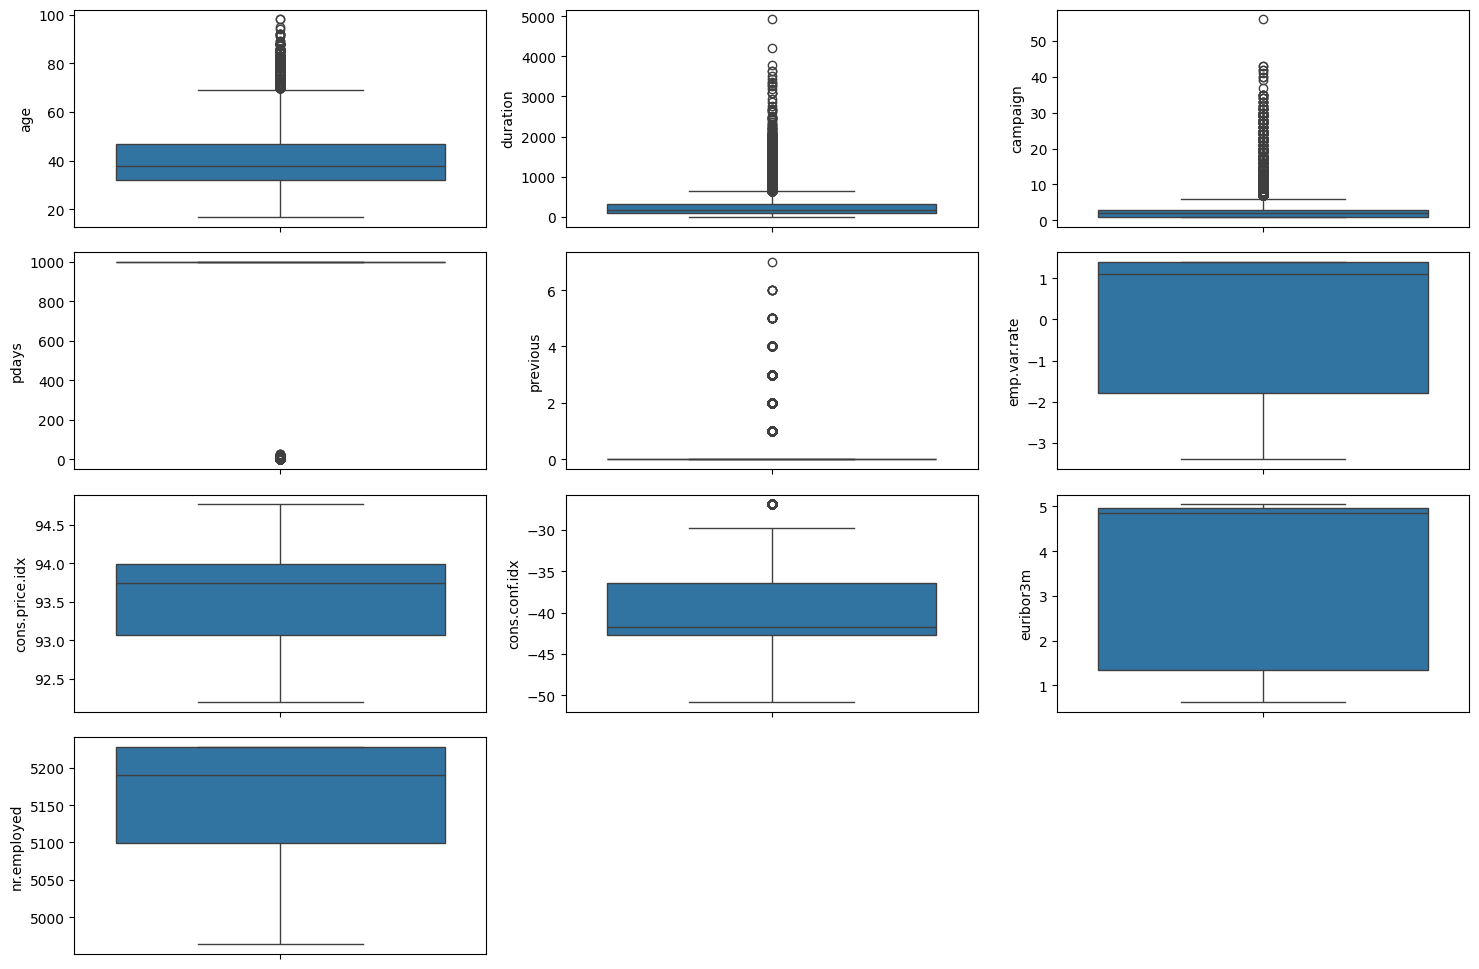

In [52]:
# Análisis de outliers
fig, axis = plt.subplots(4, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = bank_df, y = "age")
sns.boxplot(ax = axis[0, 1], data = bank_df, y = "duration")
sns.boxplot(ax = axis[0, 2], data = bank_df, y = "campaign")
sns.boxplot(ax = axis[1, 0], data = bank_df, y = "pdays")
sns.boxplot(ax = axis[1, 1], data = bank_df, y = "previous")
sns.boxplot(ax = axis[1, 2], data = bank_df, y = "emp.var.rate")
sns.boxplot(ax = axis[2, 0], data = bank_df, y = "cons.price.idx")
sns.boxplot(ax = axis[2, 1], data = bank_df, y = "cons.conf.idx")
sns.boxplot(ax = axis[2, 2], data = bank_df, y = "euribor3m")
sns.boxplot(ax = axis[3, 0], data = bank_df, y = "nr.employed")

plt.tight_layout()
fig.delaxes(axis[3, 1])
fig.delaxes(axis[3, 2])
plt.show()



In [53]:
# Análisis de valores faltantes
bank_df.isnull().sum()
bank_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,y_n
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,0,0,0,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,0,1,1,0,0,0,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,0,1,0,1,0,0,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,2,0,2,0,0,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,5,0,4,0,1,0,1,5,4,1
41172,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,3,0,4,0,0,0,1,5,4,0
41173,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,5,0,6,0,1,0,1,5,4,0
41174,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,4,0,4,0,0,0,1,5,4,1


#### - Split Train y Test

In [54]:
from sklearn.model_selection import train_test_split

X = bank_df.drop(["y_n", "y"], axis = 1)
y = bank_df["y_n"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 71)

X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,nr.employed,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n
37079,53,management,married,unknown,no,yes,yes,telephone,jul,tue,...,5076.2,6,0,5,0,1,1,0,2,1
245,33,services,divorced,unknown,no,no,no,telephone,may,mon,...,5191.0,1,2,5,0,0,0,0,0,0
36379,43,admin.,married,university.degree,no,no,yes,cellular,jun,tue,...,5076.2,2,0,6,0,0,1,1,1,1
38527,62,retired,married,high.school,no,no,no,cellular,oct,wed,...,5017.5,5,0,1,0,0,0,1,4,2
525,47,admin.,single,unknown,unknown,yes,no,telephone,may,tue,...,5191.0,2,1,5,1,1,0,0,0,1


In [55]:
# Guardo SIN ESCALAR

X_train.to_csv("/workspaces/logistic-regression-project-tutorial-pilarzarco/assets/bank_train_x.csv", index=False) # PREDICTORAS DE TRAIN
with open ("/workspaces/logistic-regression-project-tutorial-pilarzarco/assets/bank_train_y.txt", "w") as f: # TARGET DE TRAIN
    f.write(y_train.to_string(index=False))

X_test.to_csv("/workspaces/logistic-regression-project-tutorial-pilarzarco/assets/bank_test_x.csv", index=False)# PREDICTORAS DE TEST
with open ("/workspaces/logistic-regression-project-tutorial-pilarzarco/assets/bank_test_y.txt", "w") as f:# TARGET DE TEST
    f.write(y_test.to_string(index=False))


#### - Escalado de variables

In [56]:
# En este caso utilizaremos MIN-MAX

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(bank_df[num_variables_n])
bank_df_scal = pd.DataFrame(scal_features, index = bank_df.index, columns = num_variables_n)
bank_df_scal.head()

,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_n
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.481481,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
1,0.090909,0.0,0.142857,0.5,0.0,0.0,0.0,0.0,0.0,0.493827,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
2,0.090909,0.0,0.142857,0.0,0.5,0.0,0.0,0.0,0.0,0.246914,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
3,0.181818,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.283951,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
4,0.090909,0.0,0.142857,0.0,0.0,0.5,0.0,0.0,0.0,0.481481,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0


In [57]:
# Guardo CON ESCALADO

X_train.to_csv("/workspaces/logistic-regression-project-tutorial-pilarzarco/assets/bank_scal_train_x.csv", index=False) # PREDICTORAS DE TRAIN
with open ("/workspaces/logistic-regression-project-tutorial-pilarzarco/assets/bank_scal_train_y.txt", "w") as f: # TARGET DE TRAIN
    f.write(y_train.to_string(index=False))

X_test.to_csv("/workspaces/logistic-regression-project-tutorial-pilarzarco/assets/bank_scal_test_x.csv", index=False)# PREDICTORAS DE TEST
with open ("/workspaces/logistic-regression-project-tutorial-pilarzarco/assets/bank_scal_test_y.txt", "w") as f:# TARGET DE TEST
    f.write(y_test.to_string(index=False))


In [58]:
# Guardamos el SCALER
from pickle import dump
dump(scaler, open ("/workspaces/logistic-regression-project-tutorial-pilarzarco/assets/scal_scaler.pk", "wb"))


#### - Selección de características

In [59]:
# Feature selection SIN ESCALADO

from sklearn.feature_selection import f_classif, SelectKBest

num_variables_n = ["job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "contact_n", "month_n", "day_of_week_n",
                 "age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

X = bank_df[num_variables_n]
y = bank_df["y_n"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=71)

#  método de F-statistic para la selección de características
selection_model = SelectKBest(f_classif, k=5)
selection_model.fit(X_train, y_train)

ix = selection_model.get_support()

X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns.values[ix])

X_train_sel.head()


,duration,pdays,emp.var.rate,euribor3m,nr.employed
0,90.0,999.0,1.1,4.857,5191.0
1,314.0,999.0,1.4,4.961,5228.1
2,175.0,999.0,1.4,4.963,5228.1
3,167.0,999.0,-1.8,1.281,5099.1
4,193.0,999.0,1.4,4.961,5228.1


In [60]:
X_test_sel.head()

,duration,pdays,emp.var.rate,euribor3m,nr.employed
0,108.0,999.0,1.4,4.960,5228.1
1,41.0,999.0,-1.8,1.299,5099.1
2,64.0,999.0,1.4,4.958,5228.1
3,201.0,999.0,-1.1,0.881,4963.6
4,197.0,999.0,1.4,4.959,5228.1


In [61]:
# Feature selection CON ESCALADO
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

X = bank_df_scal.drop("y_n", axis = 1)
y = bank_df_scal["y_n"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 71)

selection_scal_model = SelectKBest(chi2, k = 5)
selection_scal_model.fit(X_train, y_train)
ix = selection_scal_model.get_support()
X_train_scal_sel = pd.DataFrame(selection_scal_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_scal_sel = pd.DataFrame(selection_scal_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_scal_sel.head()

,month_n,previous,emp.var.rate,euribor3m,nr.employed
0,0.000000,0.0,0.937500,0.957379,0.859735
1,0.222222,0.0,1.000000,0.980957,1.000000
2,0.222222,0.0,1.000000,0.981410,1.000000
3,0.000000,0.0,0.333333,0.146679,0.512287
4,0.111111,0.0,1.000000,0.980957,1.000000


In [62]:
X_test_scal_sel.head()

,month_n,previous,emp.var.rate,euribor3m,nr.employed
0,0.222222,0.0,1.000000,0.980730,1.000000
1,0.000000,0.0,0.333333,0.150759,0.512287
2,0.111111,0.0,1.000000,0.980277,1.000000
3,1.000000,0.0,0.479167,0.055996,0.000000
4,0.111111,0.0,1.000000,0.980503,1.000000


In [63]:
X_train_sel["y_n"] = list(y_train)
X_test_sel["y_n"] = list(y_test)

X_train_scal_sel["y_n"] = list(y_train)
X_test_scal_sel["y_n"] = list(y_test)

In [64]:
# Guardamos los dos modelos seleccionados

X_train_sel.to_csv("/workspaces/logistic-regression-project-tutorial-pilarzarco/models/model_train.csv", index = False)
X_test_sel.to_csv("/workspaces/logistic-regression-project-tutorial-pilarzarco/models/model_test.csv", index = False)

X_train_scal_sel.to_csv("/workspaces/logistic-regression-project-tutorial-pilarzarco/models/model_scal_train.csv", index = False)
X_test_scal_sel.to_csv("/workspaces/logistic-regression-project-tutorial-pilarzarco/models/model_scal_test.csv", index = False)